## Analysis of acoustic signals - plain code

This notebook is the initial implementation of the required functionalities in plain python code.

In [1]:
from acoustics import generalized_detrending, sorted_density, sorted_density_feature, gaussian_sorted_density
from acoustics_helpers import remove_direct_sound, curve_fitting_echo_density

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [6]:
# there are 4 types of impulse responses: 2x simulations and 2x measurements
with h5py.File('data.h5', 'r') as hf:
    Fs_array = list(hf['Fs'])
    dataset_simulation_polybox = list(hf['dataset_simulation_polybox'])
    dataset_simulation_sliding_lid = list(hf['dataset_simulation_sliding_lid'])
    dataset_measurement_volume = list(hf['dataset_measurement_volume'])

In [7]:
Fs = Fs_array[1]

In [8]:
# ws stands for window size
ws_detrending = int(0.025*Fs)     # 25ms
ws_sorted_density = int(0.2*Fs)   # 200ms
milliseconds_to_remove = 10 # for the remove the direct path function
signal_length = 1

In [9]:
gaussian_sd = gaussian_sorted_density(ws_detrending, Fs)
print('Sorted density for Gaussian signal: ', gaussian_sd)

Sorted density for Gaussian signal:  0.18430242781067208


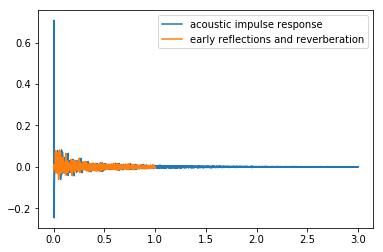

In [10]:
IR1 = dataset_simulation_sliding_lid[1]
t = np.array(range(len(IR1)))/Fs
plt.plot(t[:len(IR1)], IR1, label='acoustic impulse response')
signal = remove_direct_sound(IR1, Fs, signal_length)
plt.plot(t[:len(signal)], signal, label='early reflections and reverberation')
plt.legend()

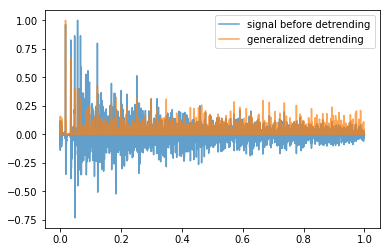

In [11]:
detrended_signal = generalized_detrending(signal, ws_detrending, Fs)
plt.plot(t[:len(signal)], signal/np.max(np.abs(signal)), alpha=0.7, label='signal before detrending')
plt.plot(t[:len(detrended_signal)], detrended_signal/np.max(np.abs(detrended_signal)), alpha=0.7, label='generalized detrending')
plt.legend()

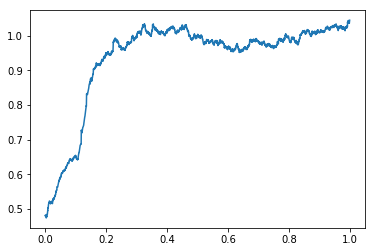

In [12]:
echo_density = sorted_density_feature(detrended_signal, ws_sorted_density, Fs)
echo_density = echo_density/gaussian_sd
plt.plot(t[:len(echo_density)], echo_density)

In [13]:
n = curve_fitting_echo_density(echo_density, Fs)
print(n)

1.5491001590582356
